In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

In [18]:
data = pd.read_csv('./New_result/Result_1/Cor_result_1.csv')
m,n = data.shape
cor_T_VPD1 = []
for i in range(m):
    if np.isnan(data['1.0'][i]) != 1:
        cor_T_VPD1.append(data['1.0'][i])
cor_SWC_VPD1 = []
for i in range(m):
    if np.isnan(data['2.0'][i]) != 1:
        cor_SWC_VPD1.append(data['2.0'][i])
        
cor_T_RECO2 = []
cor_VPD_RECO2 = []
for i in range(m):
    if np.isnan(data['3.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_T_RECO2.append(data['3.0'][i])
        cor_VPD_RECO2.append(data['4.0'][i])

cor_SWC_RECO3 = []
cor_VPD_RECO3 = []
for i in range(m):
    if np.isnan(data['5.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_SWC_RECO3.append(data['5.0'][i])
        cor_VPD_RECO3.append(data['4.0'][i])

data = pd.read_csv('./New_result/Result_1/Cor_15days_window_mathod_valid.csv')
m,n = data.shape
cor_VPD_SWC4 = []
for i in range(m):
    if np.isnan(data['VPD_SWC'][i]) != 1:
        cor_VPD_SWC4.append(data['VPD_SWC'][i])
cor_T_SWC4 = []
for i in range(m):
    if np.isnan(data['T_SWC'][i]) != 1:
        cor_T_SWC4.append(data['T_SWC'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_1884\4112591460.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


'ax4 = fig.add_subplot(2,2,4)\nlabels = [\'(VPD,SWC)\', \'(T,SWC)\']\n\nboxplot = ax4.boxplot([cor_VPD_SWC4, cor_T_SWC4],\n                whis = (5,95),\n                vert=True,  \n                patch_artist=True,\n                showfliers = False,\n                showmeans =True,\n                meanprops={\'marker\': \'^\', \'markersize\': 6, \'color\':\'red\'},\n                medianprops = {\'color\':\'black\'},\n                labels = labels,\n                widths=0.4,\n                capwidths=0.25,\n            )\n\nbox_color = \'white\'\nbox_alpha = 1.0\nfor patch in boxplot[\'boxes\']:\n    patch.set_facecolor(box_color)\n    patch.set_alpha(box_alpha)\n    patch.set_edgecolor(\'black\')  # 设置箱体边框颜色为黑色\n    patch.set_linewidth(1)\n\nax4.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)\nax4.set_ylabel(\'Correlation coefficient\', size = 12);\nax4.tick_params(axis=\'x\',labelsize=12);\nax4.tick_params(axis=\'y\',labelsize=12)\nax4.set_yticks(np.linspace(-1,

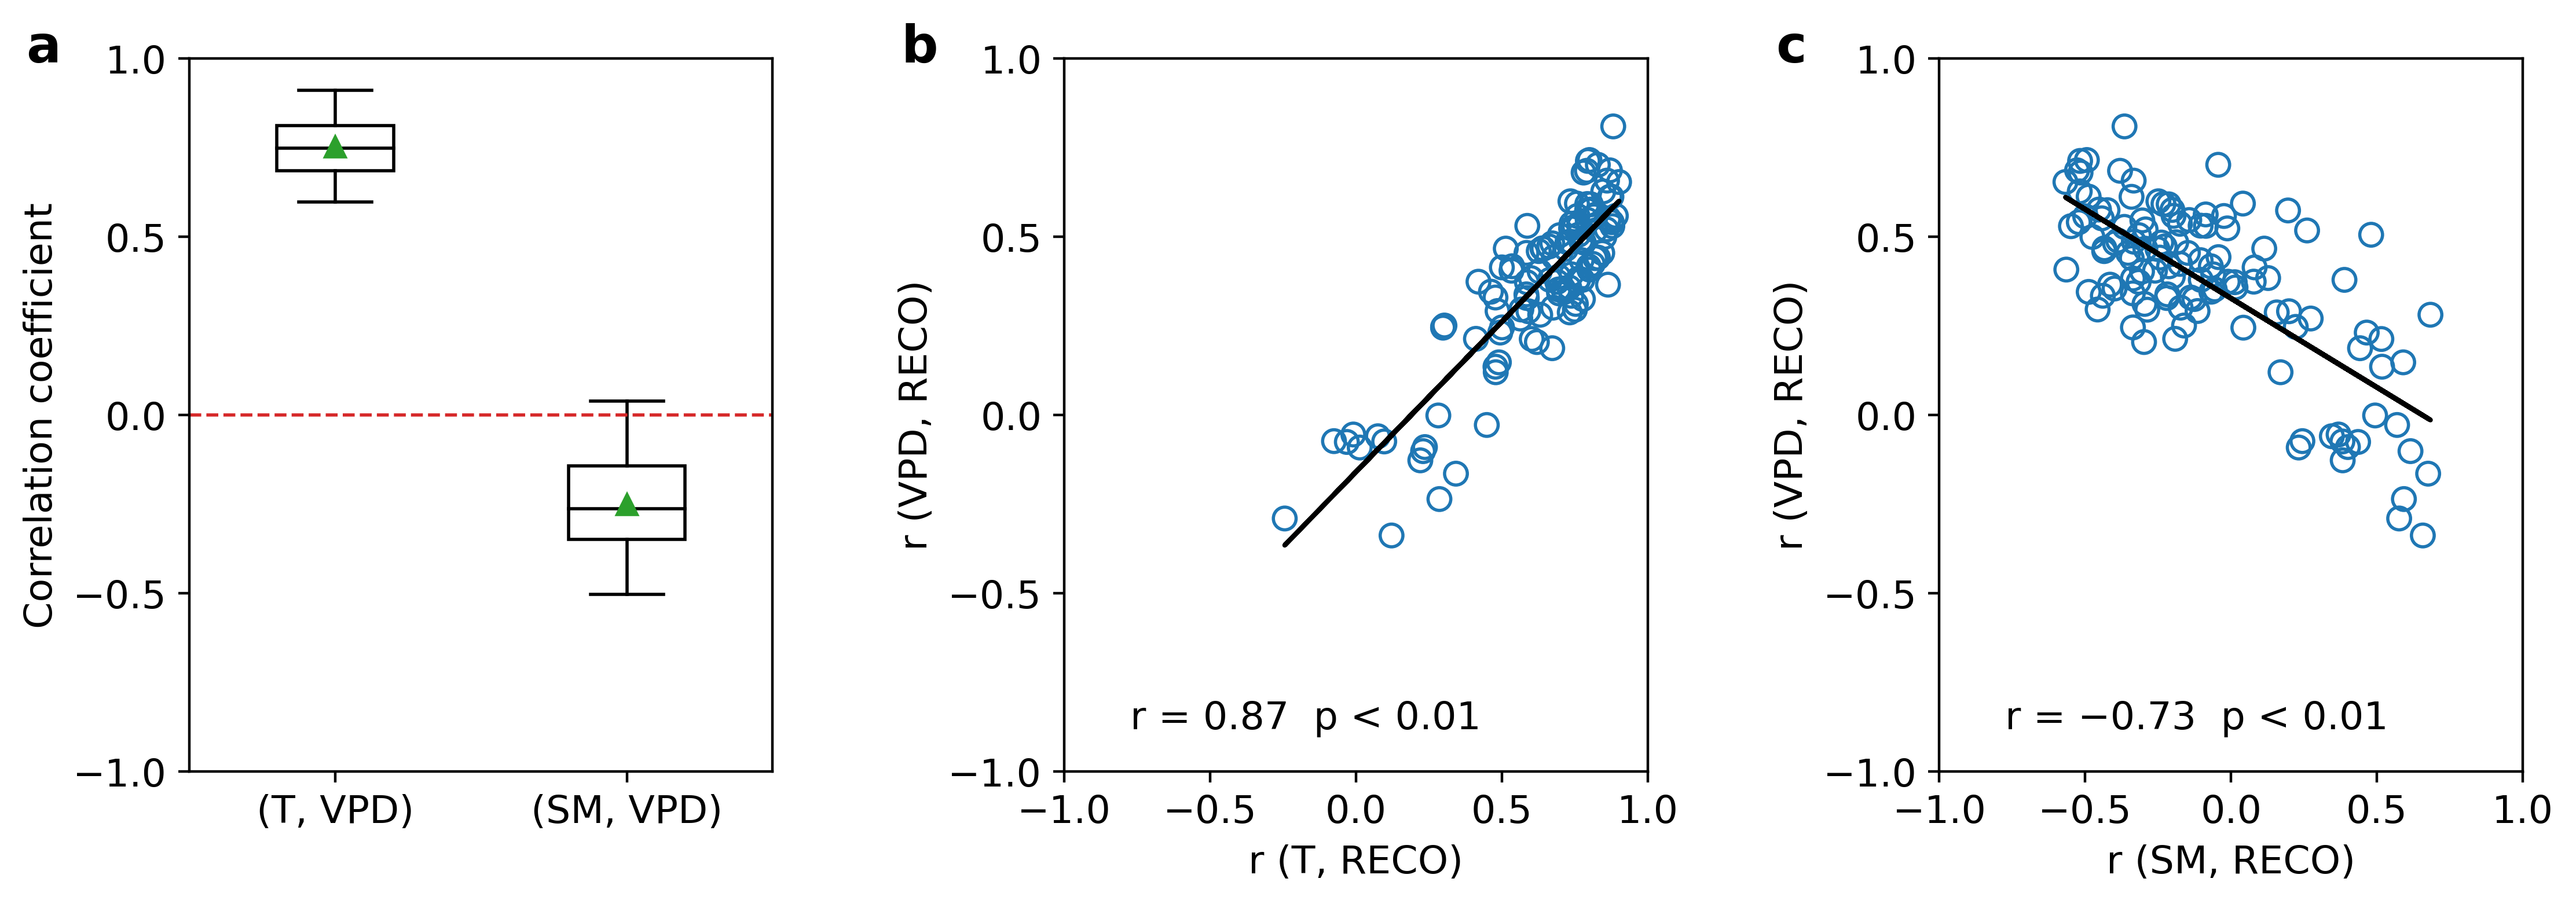

In [20]:
fig = plt.figure(figsize=(13, 4),dpi=400)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['font.family'] = 'sans-serif'


import matplotlib.font_manager as fm

# 创建自定义字体属性
font_prop = fm.FontProperties(size=12)


ax1 = fig.add_subplot(1,3,1)
cm = plt.cm.get_cmap('Blues')
labels = ['(T, VPD)', '(SM, VPD)']

boxplot = ax1.boxplot([cor_T_VPD1, cor_SWC_VPD1],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_ylabel('Correlation coefficient', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(-1,1,5))
ax1.set_ylim(-1,1)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

#####################################################################################################################################################
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(cor_T_RECO2, cor_VPD_RECO2, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO2, sm.add_constant(cor_T_RECO2)).fit()
cor_VPD_RECO2_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax2.plot(cor_T_RECO2, cor_VPD_RECO2_fit, color='black', label = "r = "+str(round(pearsonr(cor_T_RECO2, cor_VPD_RECO2)[0],2))+'  p < 0.01', zorder = 2 )
ax2.set_xlabel('r (T, RECO)',size = 12)
ax2.set_ylabel('r (VPD, RECO)',size = 12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_xlim(-0.5,1);
ax2.set_ylim(-0.5,1);
ax2.set_xticks(np.linspace(-1,1,5))
ax2.set_yticks(np.linspace(-1,1,5))
ax2.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
ax2.text(-0.28, 1.05, "b", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


#####################################################################################################################################################
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(cor_SWC_RECO3, cor_VPD_RECO3, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO3, sm.add_constant(cor_SWC_RECO3)).fit()
cor_VPD_RECO3_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax3.plot(cor_SWC_RECO3, cor_VPD_RECO3_fit, color='black', label = 'r = \u22120.73  p < 0.01', zorder = 2 )
ax3.set_xlabel('r (SM, RECO)',size = 12)
ax3.set_ylabel('r (VPD, RECO)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-0.5,1);
ax3.set_ylim(-0.5,1);
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
ax3.text(-0.28, 1.05, "c", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

#####################################################################################################################################################
'''ax4 = fig.add_subplot(2,2,4)
labels = ['(VPD,SWC)', '(T,SWC)']

boxplot = ax4.boxplot([cor_VPD_SWC4, cor_T_SWC4],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax4.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax4.set_ylabel('Correlation coefficient', size = 12);
ax4.tick_params(axis='x',labelsize=12);
ax4.tick_params(axis='y',labelsize=12)
ax4.set_yticks(np.linspace(-1,1,5))
ax4.set_ylim(-1,1)
ax4.text(-0.28, 1.05, "d", transform=ax4.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
'''

In [21]:
data = pd.read_csv('./New_result/Result_1/Cor_result_SWC2.csv')
m,n = data.shape
cor_SWC_RECO1 = []
cor_VPD_RECO1 = []
for i in range(m):
    if np.isnan(data['5.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_SWC_RECO1.append(data['5.0'][i])
        cor_VPD_RECO1.append(data['4.0'][i])

data = pd.read_csv('./New_result/Result_1/Cor_result_SWC3.csv')
m,n = data.shape
cor_SWC_RECO2 = []
cor_VPD_RECO2 = []
for i in range(m):
    if np.isnan(data['5.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_SWC_RECO2.append(data['5.0'][i])
        cor_VPD_RECO2.append(data['4.0'][i])

'ax3 = fig.add_subplot(1,2,2)\nax3.scatter(cor_SWC_RECO2, cor_VPD_RECO2, s=50, edgecolor=\'tab:blue\', facecolor=\'none\')\nmodel = sm.OLS(cor_VPD_RECO2, sm.add_constant(cor_SWC_RECO2)).fit()\ncor_VPD_RECO2_fit = model.fittedvalues\nr_squared = model.rsquared\nintercept,slope1 = model.params\nax3.plot(cor_SWC_RECO2, cor_VPD_RECO2_fit, color=\'black\', label = "r = "+str(round(pearsonr(cor_SWC_RECO2, cor_VPD_RECO2)[0],2))+\'  p < 0.01\', zorder = 2 )\nax3.set_xlabel(\'r (SWC, RECO)\',size = 12)\nax3.set_ylabel(\'r (VPD, RECO)\',size = 12)\nax3.tick_params(axis=\'x\', labelsize=12)\nax3.tick_params(axis=\'y\', labelsize=12)\nax3.set_xlim(-0.5,1);\nax3.set_ylim(-0.5,1);\nax3.set_xticks(np.linspace(-1,1,5))\nax3.set_yticks(np.linspace(-1,1,5))\nax3.legend(fontsize=12, edgecolor=\'white\', loc=\'lower left\', frameon=False, handlelength = 0)\nax3.text(-0.28, 1.05, "b", transform=ax3.transAxes,\n         fontsize=16, fontweight=\'bold\', va=\'top\', ha=\'left\')'

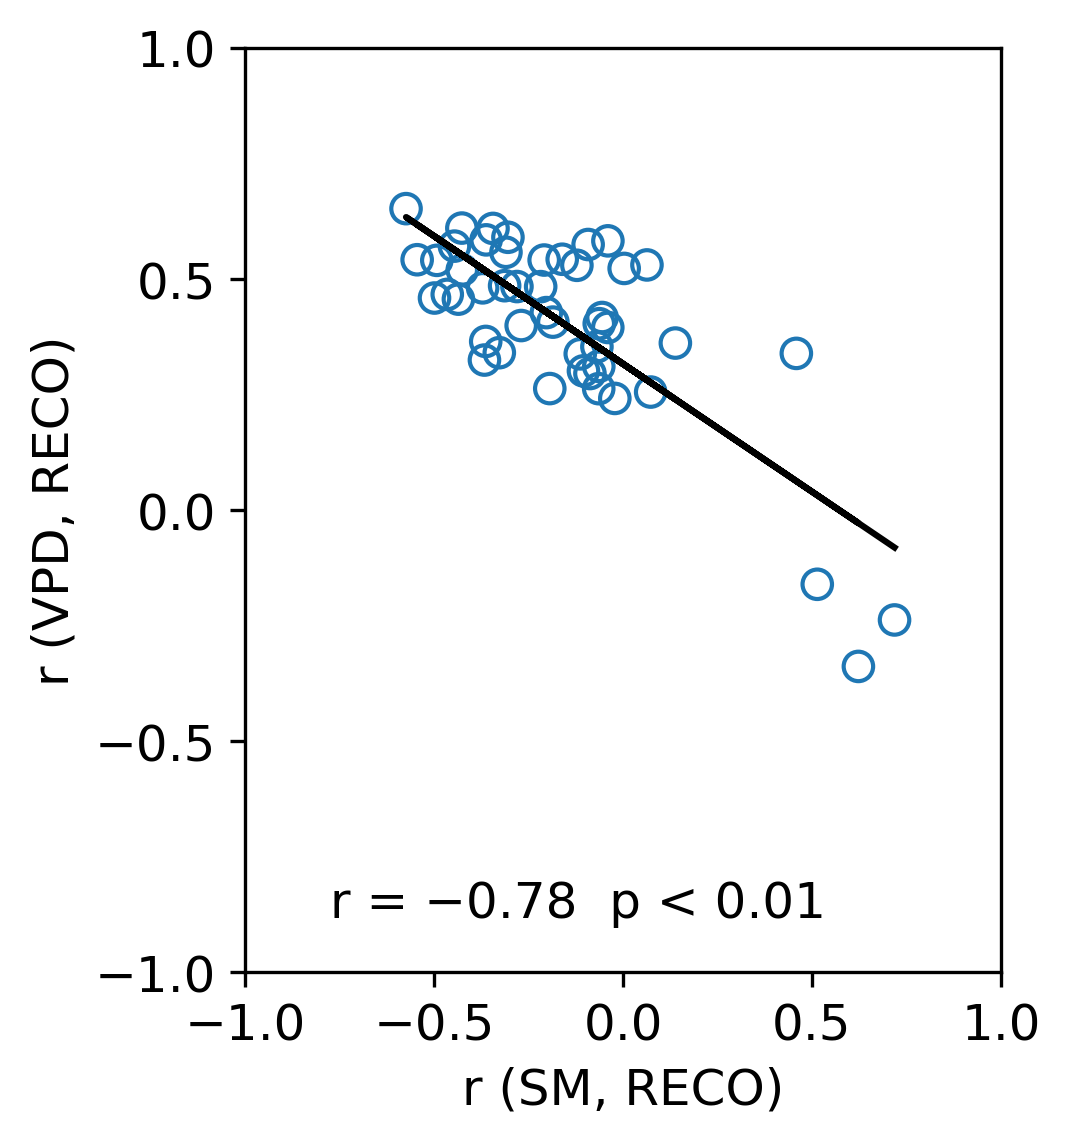

In [22]:
fig = plt.figure(figsize=(13*2.5/4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.linewidth'] = 0.8

ax3 = fig.add_subplot(1,2,1)
ax3.scatter(cor_SWC_RECO1, cor_VPD_RECO1, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO1, sm.add_constant(cor_SWC_RECO1)).fit()
cor_VPD_RECO1_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax3.plot(cor_SWC_RECO1, cor_VPD_RECO1_fit, color='black', label = "r = \u22120.78  p < 0.01", zorder = 2 )
ax3.set_xlabel('r (SM, RECO)',size = 12)
ax3.set_ylabel('r (VPD, RECO)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-0.5,1);
ax3.set_ylim(-0.5,1);
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
#ax3.text(-0.28, 1.05, "a", transform=ax3.transAxes,
#         fontsize=16, fontweight='bold', va='top', ha='left')

#####################################################################################################################################################
'''ax3 = fig.add_subplot(1,2,2)
ax3.scatter(cor_SWC_RECO2, cor_VPD_RECO2, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO2, sm.add_constant(cor_SWC_RECO2)).fit()
cor_VPD_RECO2_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax3.plot(cor_SWC_RECO2, cor_VPD_RECO2_fit, color='black', label = "r = "+str(round(pearsonr(cor_SWC_RECO2, cor_VPD_RECO2)[0],2))+'  p < 0.01', zorder = 2 )
ax3.set_xlabel('r (SWC, RECO)',size = 12)
ax3.set_ylabel('r (VPD, RECO)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-0.5,1);
ax3.set_ylim(-0.5,1);
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
ax3.text(-0.28, 1.05, "b", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')'''

In [4]:
#滑动窗口内谷底AVP下的VPD和SWC相关系数

In [11]:
data = pd.read_csv('./New_result/Result_1/Cor_15days_window_mathod_valid.csv')
m,n = data.shape
cor_VPD_SWC = []
for i in range(m):
    if np.isnan(data['VPD_SWC'][i]) != 1:
        cor_VPD_SWC.append(data['VPD_SWC'][i])
cor_T_SWC = []
for i in range(m):
    if np.isnan(data['T_SWC'][i]) != 1:
        cor_T_SWC.append(data['T_SWC'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_10476\1135820987.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


(-1.0, 1.0)

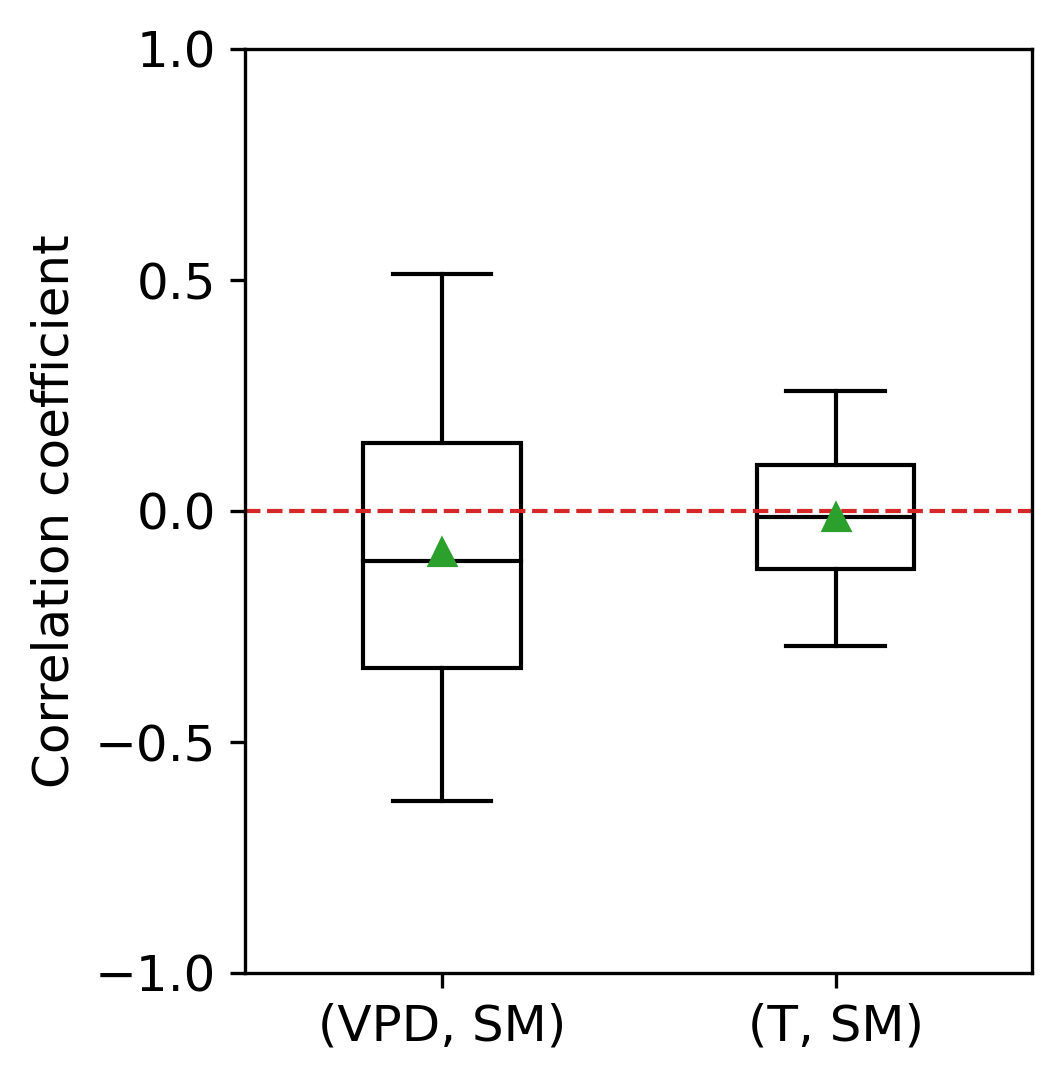

In [12]:
fig = plt.figure(figsize=(13*2.5/4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
plt.rcParams['axes.linewidth'] = 0.8


ax1 = fig.add_subplot(1,2,1)
cm = plt.cm.get_cmap('Blues')
labels = ['(VPD, SM)', '(T, SM)']

boxplot = ax1.boxplot([cor_VPD_SWC, cor_T_SWC],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_ylabel('Correlation coefficient', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(-1,1,5))
ax1.set_ylim(-1,1)
#ax1.text(-0.3, 1.1, "a", transform=ax1.transAxes,
#         fontsize=22, fontweight='bold', va='top', ha='left')

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde

In [16]:
data = pd.read_csv('./New_result/Supplement/Cor_RECO_VPD_SWC_method.csv')
m,n = data.shape
cor_VPD_RECO4 = []
cor_SWC_RECO4 = []
for i in range(m):
    if np.isnan(data['VPD_RECO'][i]) != 1 and np.isnan(data['SWC_RECO'][i]) != 1:
        cor_VPD_RECO4.append(data['VPD_RECO'][i])
        cor_SWC_RECO4.append(data['SWC_RECO'][i])

In [17]:
x = cor_VPD_RECO4
y = cor_SWC_RECO4
xy = np.vstack([x,y])
z1 = gaussian_kde(xy)(xy)

Text(0.05, 0.1, 'r = -0.18  p < 0.01')

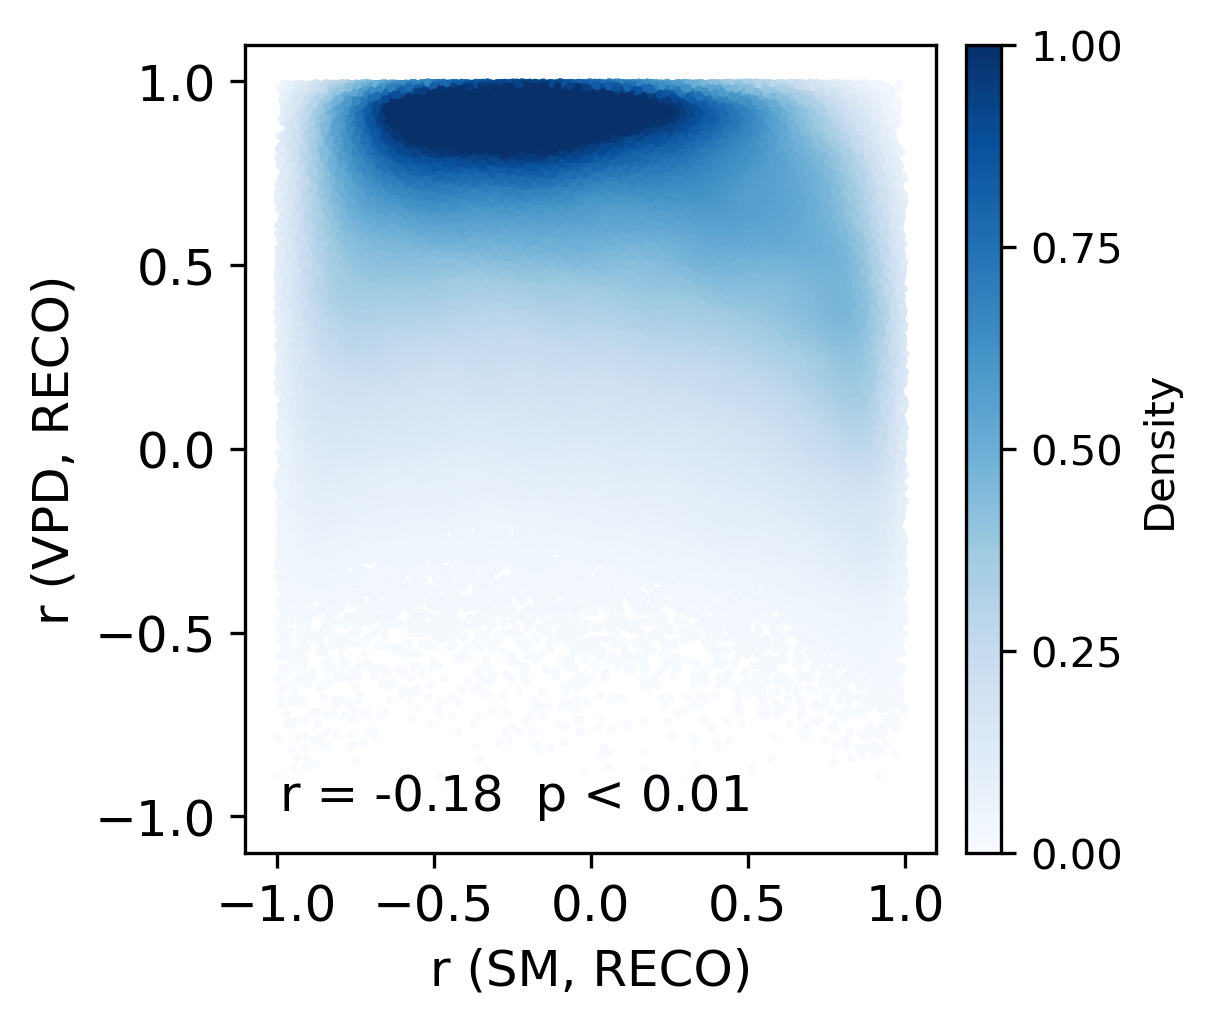

In [18]:
fig = plt.figure(figsize=(13*1/4, 3.5),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.linewidth'] = 0.8
ax3 = fig.add_subplot(1,1,1)
im3 = ax3.scatter(cor_SWC_RECO4, cor_VPD_RECO4, c=z1, s=1, cmap='Blues', vmin=0, vmax=1, label = "r = "+str(round(pearsonr(cor_SWC_RECO4, cor_VPD_RECO4)[0],2))+'  p < 0.01')

divider3 = make_axes_locatable(ax3)
cax3 = divider3.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(cax3)
cbar3 = plt.colorbar(im3, cax=cax3, ticks = np.linspace(0,1,5))
cbar3.set_label('Density')

model = sm.OLS(cor_VPD_RECO4, sm.add_constant(cor_SWC_RECO4)).fit()
cor_VPD_RECO4_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
#ax3.plot(cor_SWC_RECO4, cor_VPD_RECO4_fit, color='black', label = "r = "+str(round(pearsonr(cor_SWC_RECO4, cor_VPD_RECO4)[0],2))+'  p < 0.01', zorder = 2 )
ax3.set_xlabel('r (SM, RECO)',size = 12)
ax3.set_ylabel('r (VPD, RECO)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-1.1,1.1)
ax3.set_ylim(-1.1,1.1)
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
#ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
#ax3.text(-0.28, 1.05, "", transform=ax3.transAxes,
#         fontsize=16, fontweight='bold', va='top', ha='left')
ax3.text(0.05, 0.1, "r = "+str(round(pearsonr(cor_SWC_RECO4, cor_VPD_RECO4)[0],2))+'  p < 0.01', transform=ax3.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')


In [2]:
data = pd.read_csv('./New_result/Result_1/Cor_result_T_SWC1.csv')
m,n = data.shape
cor_T_SWC1 = []
for i in range(m):
    if np.isnan(data['1.0'][i]) != 1:
        cor_T_SWC1.append(data['1.0'][i])
        
data = pd.read_csv('./New_result/Result_1/Cor_result_T_SWC2.csv')
m,n = data.shape
cor_T_SWC2 = []
for i in range(m):
    if np.isnan(data['1.0'][i]) != 1:
        cor_T_SWC2.append(data['1.0'][i])

data = pd.read_csv('./New_result/Result_1/Cor_result_T_SWC3.csv')
m,n = data.shape
cor_T_SWC3 = []
for i in range(m):
    if np.isnan(data['1.0'][i]) != 1:
        cor_T_SWC3.append(data['1.0'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_10476\1106517133.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


(-1.0, 1.0)

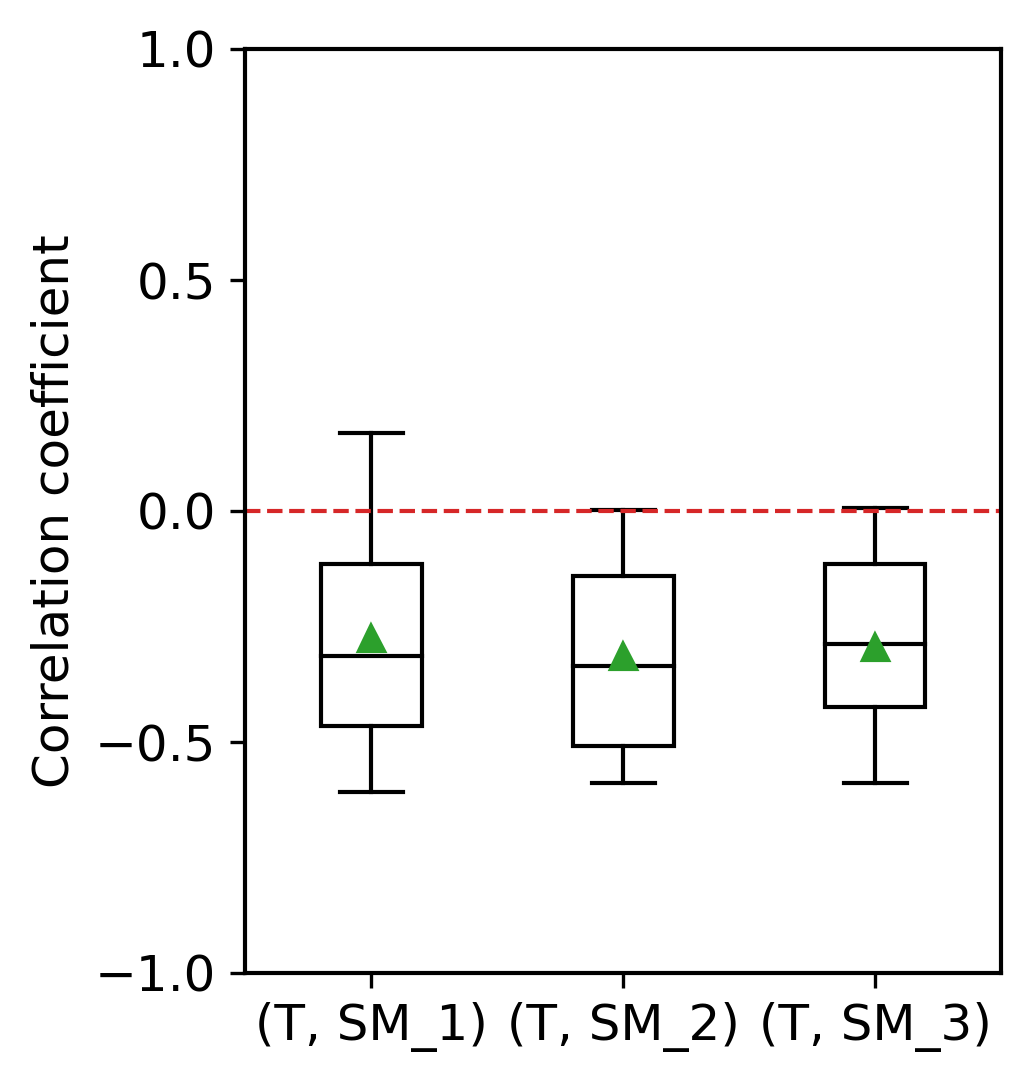

In [10]:
fig = plt.figure(figsize=(13*1/4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
plt.rcParams['axes.linewidth'] = 1


ax1 = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')
labels = ['(T, SM_1)', '(T, SM_2)', '(T, SM_3)']

boxplot = ax1.boxplot([cor_T_SWC1, cor_T_SWC2, cor_T_SWC3],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_ylabel('Correlation coefficient', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(-1,1,5))
ax1.set_ylim(-1,1)
#ax1.text(-0.3, 1.1, "a", transform=ax1.transAxes,
#         fontsize=22, fontweight='bold', va='top', ha='left')